<a href="https://colab.research.google.com/github/PaoloBarba/ADM_HW2-Group18/blob/main/Copia_di_main_Albachiara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algorithmic Methods of Data Mining**

#Academic year 2022–2023

# Homework 2 - Instagram Profiles & Posts

Authors: Barba Paolo, Bellaroba Albachiara, Soukaina Alaoui, Navid

#Import the packages and upload datasets


In [1]:
import pandas as pd
#import functions as fc
import random
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline     


In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
locations =pd.read_csv('/content/drive/MyDrive/ADM_HW2/instagram_locations.csv',sep='\t')
profiles =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_profiles.csv",sep='\t')
posts =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv",sep='\t',nrows=1000000)
#print(posts)

#Research question 1: Exploratory Data Analysis
## Data summaritation

In order to do an explanatory data analysis we will go through three different steps: Data Explorations, Data Manipulations and Data Summaritation.
First we will show the firsts rows of the datasets we are analysing.


In [ ]:
locations.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [ ]:
profiles.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [ ]:
posts.head()

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1.837593e+09,4.574268e+14,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1.131527e+09,4.574268e+14,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


Now we can look at the columns of our datasets in order to understand which variables we are analsing.
First of all we are going to first an info into the dataset to quickly understand the variables we are working with, get the numbers of rows and 
columns we have for each dataset

In [ ]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [1]:
profiles.info()

NameError: ignored

In [ ]:
posts.info()

In [ ]:
print("Locations dataframe has " + str(locations.shape[0]) + " observations and "  + str(locations.shape[1]) + " variables")
print("Profiles dataframe has " + str(profiles.shape[0]) + " observations and "  + str(profiles.shape[1]) + " variables")
print("Posts dataframe has " + str(posts.shape[0]) + " observations and "  + str(posts.shape[1]) + " variables")

We are going one step further, having a better understanding of the statistical properties of these dataframes by using describe method that give us basics statistics of all the numerical columns we have.We are doing a statistical summaritation at all the numeric variables that have sense to summarize

In [ ]:
profiles[["following" , "followers" , "n_posts" ]].describe()

In [ ]:
posts[["numbr_likes","number_comments"]].describe()

We can see for istance that the maximum is too far from the 75% percentile, this sounds as an error that can influence a lot the statistics.
In order to do a better analysis we might clean the datasets as much as possible doing steps descibed as below. 


1.   **Dealing with duplicates rows**:
      we drop every duplicates rows because contengono useless informations 
2.    **Dealing with missing values**:
      we check the percentage of missing value in each columns, we drop a columns that contains missing values over a set trheshold. After we select some columns of interest and drop the NA (gli darò una spiegazione per sto motivo giuro :D)

3. **Dealing with outliers:** It is risky to include outliers in data driven models For some variables of interest we actually have some mistyping or error data that influence so much the distribution, we want to eliminate them according to z-scores ( glie spiego pure questo tranqui  :p ). 



In [ ]:
#Duplicates rows
profiles.drop_duplicates(inplace=True)
posts.drop_duplicates(inplace=True)
locations.drop_duplicates(inplace=True)

In [ ]:
#Dealing with missing values, columns that contains so much Na
#check for null values / % of null values we have
print('Null values percentage for locations dataset')
print(locations.isnull().sum()/locations.shape[0])
print('\n')
print('Null values percentage for profiles dataset')
print(profiles.isnull().sum()/profiles.shape[0])
print('\n')
print('Null values percentage for posts dataset')
print(posts.isnull().sum()/posts.shape[0])

In [ ]:
#remove null colums over the threshold
profiles.dropna(thresh = len(profiles)*.6, axis=1)
locations.dropna(thresh = len(locations)*.6, axis=1)

Let's have a look at the distributions of some variables of interest 

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
axes = axes.ravel() 
cols = ["numbr_likes", "number_comments"]  
colors = ['tab:blue', 'tab:orange']  

for col, color, ax in zip(cols, colors, axes):
    posts[col].plot(kind= 'hist', ax=ax, color=color, label=col, title=col,grid=False,fontsize=7)
    ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
axes = axes.ravel() 
cols = ["numbr_likes", "number_comments"]  
colors = ['tab:blue', 'tab:orange']  

for col, color, ax in zip(cols, colors, axes):
    posts[col].plot(kind= 'box', ax=ax, color=color, label=col, title=col,grid=False,fontsize=5)
fig.tight_layout()
plt.show()

These distributions are sintomo di errors during the phase of raccolta dati:
So for these variables of interest we have to deal with Na and ouliers values.
So for Na values we have more than optzion to do.
Replace with the mean: if there are a lot of missing value we are concentrando the distribution in the mean value and we lose informations about the shape of the distributions (that's a shit).
Drop Na: we are loosing a relevant percentage of the informations we have, by the way having a huge quantità of data, this don't influence so much the distrubtion we are anylising. So in this case we will go through this procedure :D.

In [ ]:
posts.dropna(subset=['numbr_likes', 'number_comments'])

The existence of one single misleading value has the potential to change the conclusion implied by the model. Is is therefore, important to detect and then decide whether to remove it or not from the dataset. Sometimes the data point may be extremely high or low but that does not mean it is an outlier that we want to get rid of.
We have more than one method to dedect outliers:
Inter Quartile Range : IQR. IQR = Q3-Q1 we use only 50% of the data!!!
Z-score:Z-score is just another form of standard deviation procedure. Z-score is used to convert the data into another dataset with mean = 0.

In [ ]:
mean_n_comments = np.mean(posts.number_comments)
s_n_comments = np.std(posts.number_comments)
posts['Z-score_comments'] = (posts.number_comments - mean_n_comments)/ s_n_comments


mean_n_likes = np.mean(posts.numbr_likes)
s_n_likes = np.std(posts.numbr_likes)
posts['Z-score_likes'] = (posts.numbr_likes - mean_n_likes)/ s_n_likes



In [ ]:
plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
plt.subplot(121)
plt.hist(posts.number_comments[abs(posts['Z-score_comments']) > 3],bins=20)
plt.subplot(122)
plt.hist(posts.numbr_likes[abs(posts['Z-score_likes']) > 3],bins=20)
plt.show()

In [ ]:
plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
plt.subplot(121)
plt.boxplot(posts.number_comments[abs(posts['Z-score_comments']) > 3],showfliers= False)
plt.subplot(122)
plt.boxplot(posts.numbr_likes[abs(posts['Z-score_likes']) > 3], showfliers= False)
plt.show()

In [ ]:
data_outliers= profiles[(profiles.followers) < profiles.followers.quantile(0.95)]
data_outliers= data_outliers[(profiles.followers) > profiles.followers.quantile(0.05)]

In [ ]:
data_outliers.boxplot('followers')
plt.show()
#the distributions is quite skwnedss
#showfliers= false

In [ ]:
locations.region.value_count() / locations.regions.notnull().sum()  #give us the percentage of the region

# RQ2: Let's explore the dataset by finding simple insights regarding the profile and posts.
### 1- Plot the number of posts for each profile in descending order.

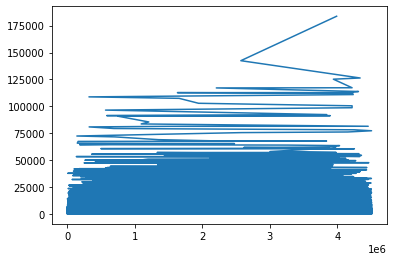

In [8]:
plt.plot(profiles.n_posts.sort_values(ascending=False))
plt.show()


### 2- What posts have the highest number of "likes"?

In [17]:
likedposts=pd.DataFrame(columns=['post_id', 'numbr_likes'])
for chunk in tqdm(pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv", usecols=['post_id', 'numbr_likes'], delimiter='\t', chunksize=500000)):
    likedposts=pd.concat([likedposts, (chunk.sort_values(by='numbr_likes', ascending=False).head(25))])

likedposts=likedposts.sort_values(by='numbr_likes', ascending=False).head(25)
likedposts.index=['Post'+str(i+1) for i in range(25)]
likedposts

86it [04:02,  2.82s/it]


,post_id,numbr_likes
Post1,Bt3yaXmAM0d,8822952.0
Post2,BuwffB7g8cK,5447066.0
Post3,Buc1gyZAaMQ,5116398.0
Post4,BvcukE8AMuG,4271466.0
Post5,BqSLFVBFLfq,4264745
Post6,BwTSXBKg7gN,3586546
Post7,Btw8pFXAvQm,3558599.0
Post8,BvC3n6_gqin,3533326.0
Post9,Bw7vqLrFkHi,3340297
Post10,Bw2gTH1AiDA,3311246


### 3- What posts have the most and the least number of comments?

In [12]:
comments=pd.DataFrame(columns=['post_id', 'numbr_likes'])
for chunk in tqdm(pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv", usecols=['post_id', 'number_comments'], delimiter='\t', chunksize=500000)):
    comments=pd.concat([comments, chunk])

maxcomments=comments.sort_values(by='number_comments', ascending=False).head(1)
maxcomments.index=['Post'+str(i)]
maxcomments

mincomments=comments.sort_values(by='number_comments', ascending=False).head(-1)
mincomments.index=['Post'+str(i)]
mincomments

39it [09:58, 15.34s/it]


KeyboardInterrupt: ignored

### 4- How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [6]:
loc=pd.DataFrame(columns=['location_id'])
for chunk in tqdm(pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv", usecols=['location_id'], delimiter='\t', chunksize=500000)):
    loc=pd.concat([loc, (chunk)])

86it [03:11,  2.23s/it]


AttributeError: ignored

In [10]:
noloc=loc.location_id.isna().sum()
noloc
#num di post con location non taggate

12972772

In [34]:
#conloc=loc.location_id.dropna().sum()
#conloc=loc.location_id.sum()
conloc=loc.location_id.count()-noloc
conloc
#num post con location taggate

16764653

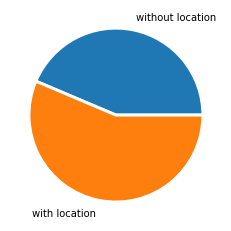

In [35]:

prop=[noloc, conloc]
names='without location', 'with location'
plt.pie(prop, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.show()

### 5- How many posts include only photos? How many also have videos?

### 6- What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

# RQ7

In [ ]:
n = 42710197
s = 1000
filename = "/content/drive/MyDrive/ADM_HW2/instagram_posts.csv"
df2= profiles[['followers', 'sid']]
l=[]
for i in range(1000):
  skip = sorted(random.sample(range(n),n-s))
  df = pd.read_csv(filename, usecols= ['numbr_likes' , 'sid_profile'], skiprows=skip, sep='\t')
  df1=posts[['numbr_likes' , 'sid_profile']]
  df1=df1.dropna()
  df2=df2.dropna()
  data=pd.merge(df1, df2, left_on="sid_profile", right_on="sid").drop('sid', axis=1)
  l.append(sum(data.apply(lambda x :  x.numbr_likes / x.followers, axis = 1 ) > 0.20)/ data.shape[0])




ValueError: ignored

In [ ]:
pd.read_csv(filename, sep='\t', usecols= ['numbr_likes' , 'sid_profile'],)